In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ezdxf

In [3]:
%matplotlib inline

In [4]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

(0, 25)

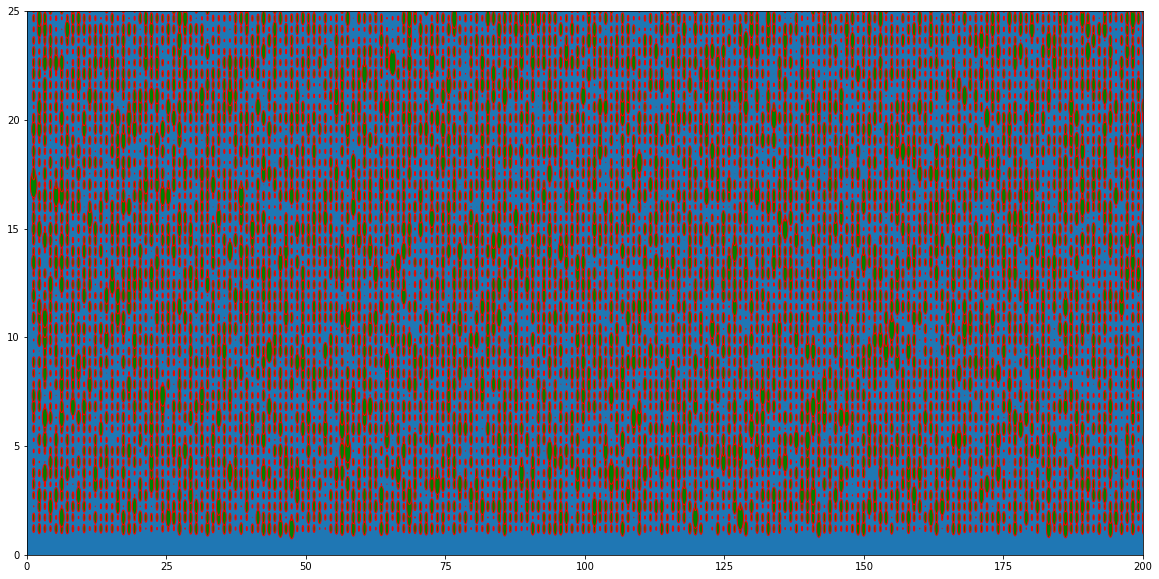

In [26]:
nx,ny = (200,50)
lx, ly=(200,25)
x, y = (np.linspace(0,lx, nx), np.linspace(0,ly, ny))
xx,yy = np.meshgrid(x,y)
rr = np.random.normal(0.2,0.1,(nx,ny))
rr_max = np.max(rr)
offset = rr_max
margin =2.0
plt.figure(figsize=(20, 10))
fig = plt.gcf()
frame = plt.Rectangle(height=ly+(offset*2*margin),width=lx+(offset*2*margin),xy=(0,0))
fig.gca().add_artist(frame)

xx = xx + (offset*margin)
yy = yy + (offset*margin)

for j in range(xx.shape[0]):
    for i in range(xx[j].shape[0]):
        circle1 = plt.Circle((xx[j][i], yy[j][i]), rr[i][j] , color='r')
        circle1.set_facecolor('g')
        fig.gca().add_artist(circle1)
plt.xlim(0, lx)
plt.ylim(0, ly)
# plt.grid(1)
# plt.savefig('test.svg')

In [27]:
dwg = ezdxf.new('AC1015')
dwg.layers.new(name = 'frame')
dwg.layers.new(name = 'media')

In [29]:
msp = dwg.modelspace()
width=200+(2*offset*margin)
height=25+(2*offset*margin)
xy=(0,0)
points = [xy, (width, xy[0]), (width, height), (xy[0], height), xy]
msp.add_lwpolyline(points,dxfattribs={'layer': 'frame'})
for j in range(xx.shape[0]):
    for i in range(xx[j].shape[0]):
        msp.add_circle((xx[j][i],yy[j][i]),rr[i][j],dxfattribs={'layer':'media'})
dwg.saveas("/Users/georgepamfilis/PycharmProjects/compy/packing/2D/iso_v4.dxf")

In [20]:
height

53.553854320704204

In [21]:
height/2

26.776927160352102